# Q4 Code

             i             z          ord0          ord1          ord2          ord3          ord4          ord5          ord6          ord7          ord8          ord9
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             0      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
             1      0.000000      0.000000     75.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
             2      3.000000    225.000000     75.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
             3      3.000000    225.000000     77.000000      0.666667      0.222222      0.000000      0.000000      0.000000      0.000000      0.000000 

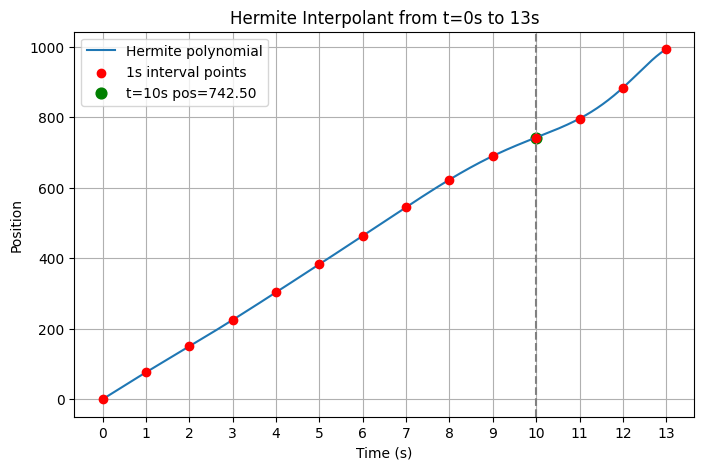

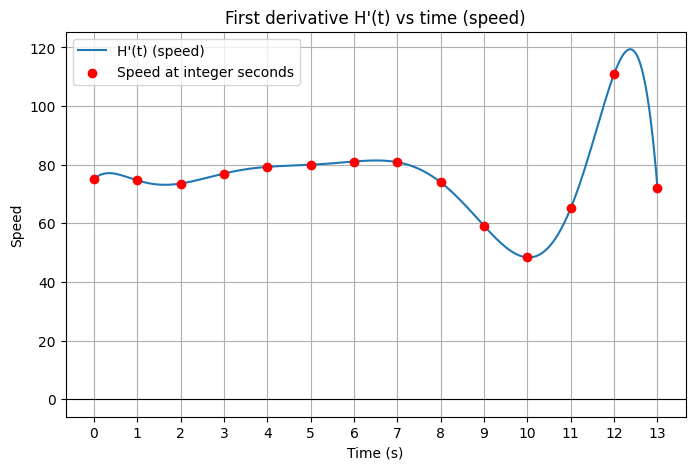

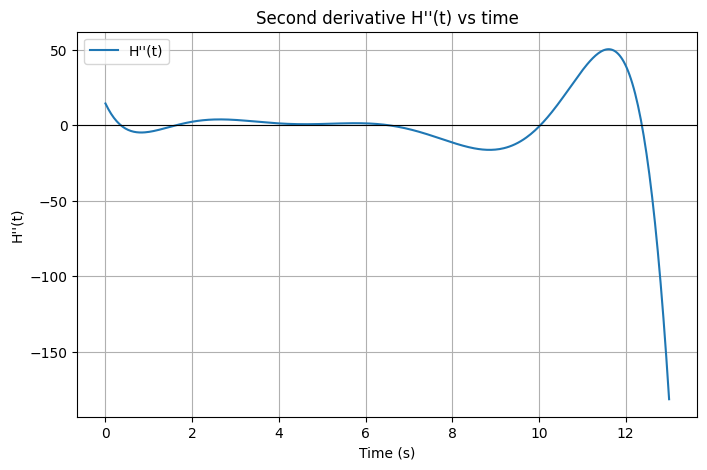

Iteration1, value of x is 12.5, error:=0.5
Iteration2, value of x is 12.25, error:=0.25
Iteration3, value of x is 12.375, error:=0.125
Iteration4, value of x is 12.3125, error:=0.0625
Iteration5, value of x is 12.34375, error:=0.03125
Iteration6, value of x is 12.359375, error:=0.015625
Iteration7, value of x is 12.3671875, error:=0.0078125
Iteration8, value of x is 12.37109375, error:=0.00390625
Iteration9, value of x is 12.373046875, error:=0.001953125
Iteration10, value of x is 12.3720703125, error:=0.0009765625
Iteration11, value of x is 12.37158203125, error:=0.00048828125
Iteration12, value of x is 12.371826171875, error:=0.000244140625
Iteration13, value of x is 12.3719482421875, error:=0.0001220703125
Iteration14, value of x is 12.37188720703125, error:=6.103515625e-05
The final value is:=12.37188720703125, number of iterations:=14 and the error has been minimized:= 6.103515625e-05
Final speed:= 119.41733809578636  ft/s


In [1]:
# Hermite divided-difference full table (orders 0..9) for 5 nodes (duplicated -> 10 rows)
import numpy as np
import matplotlib.pyplot as plt
t_vals  = [0.0, 3.0, 5.0, 8.0, 13.0]
x_vals  = [0.0, 225.0, 383.0, 623.0, 993.0]
v_vals  = [75.0, 77.0, 80.0, 74.0, 72.0]  # f'(t)

n  = len(t_vals)
N  = 2 * n  # duplicated length

# Build duplicated z and f arrays
z = []
f = []
for i in range(n):
    z.append(t_vals[i]); z.append(t_vals[i])
    f.append(x_vals[i]); f.append(x_vals[i])

# Initialize divided difference table dd[N][N]
dd = [[0.0]*N for _ in range(N)]
for i in range(N):
    dd[i][0] = f[i]  # order 0

# First-order divided differences (order = 1)
for i in range(1, N):
    if z[i] == z[i-1]:
        dd[i][1] = v_vals[i//2]
    else:
        dd[i][1] = (dd[i][0] - dd[i-1][0]) / (z[i] - z[i-1])

# Higher orders (2 .. N-1)
for order in range(2, N):
    for i in range(order, N):
        numerator = dd[i][order-1] - dd[i-1][order-1]
        denom     = z[i] - z[i-order]
        dd[i][order] = numerator / denom

# Formatting helpers
COLW = 14  # column width
def fmt(v):
    if v == 0:
        return "0.000000"
    av = abs(v)
    if 1e-3 <= av < 1e6:
        return f"{v:.6f}"
    else:
        return f"{v:.3e}"

# Prepare header
headers = ["i", "z"] + [f"ord{j}" for j in range(N)]
line = "".join(f"{h:>{COLW}}" for h in headers)
print(line)
print("-" * len(line))

# Rows
for i in range(N):
    row_items = [f"{i}", f"{z[i]:.6f}"]
    for j in range(N):
        row_items.append(fmt(dd[i][j]))
    print("".join(f"{item:>{COLW}}" for item in row_items))

#Constructing our hermite polynomial
def H(t):
    # Collect diagonal coefficients
    coeffs = [dd[k][k] for k in range(len(z))]  # length 10
    total = coeffs[0]
    prod = 1.0
    for k in range(1, len(z)):
        prod *= (t - z[k-1])
        total += coeffs[k] * prod
    return total

def H_prime(t, h=1e-4):
    return (H(t + h) - H(t - h)) / (2*h)

# Evaluate position and speed at t = 10
t0 = 10.0
pos_at_10 = H(t0)
speed_at_10 = H_prime(t0)

print(f"Position at t = {t0} s: {pos_at_10:.6f}")
print(f"Speed at t = {t0} s: {speed_at_10:.6f}")

# Plot from t=0 to 13 (step of 1s for markers)
t_dense = np.linspace(0, 13, 400)
y_dense = [H(t) for t in t_dense]

t_marks = np.arange(0, 14, 1)
y_marks = [H(t) for t in t_marks]

plt.figure(figsize=(8,5))
plt.plot(t_dense, y_dense, label="Hermite polynomial")
plt.scatter(t_marks, y_marks, color="red", zorder=5, label="1s interval points")
plt.axvline(t0, color="gray", linestyle="--")
plt.scatter([t0], [pos_at_10], color="green", s=60, label=f"t=10s pos={pos_at_10:.2f}")
plt.title("Hermite Interpolant from t=0s to 13s")
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.xticks(t_marks)
plt.grid(True)
plt.legend()
plt.show()

#Now, plotting First Derivative of hermite:

# Plot first derivative from 0 to 13
t_dense = np.linspace(0, 13, 400)
y_prime = [H_prime(t) for t in t_dense]

t_marks = np.arange(0, 14, 1)
y_marks = [H_prime(t) for t in t_marks]

plt.figure(figsize=(8,5))
plt.plot(t_dense, y_prime, label="H'(t) (speed)")
plt.scatter(t_marks, y_marks, color="red", zorder=5, label="Speed at integer seconds")
plt.axhline(0, color="black", linewidth=0.8)
plt.title("First derivative H'(t) vs time (speed)")
plt.xlabel("Time (s)")
plt.ylabel("Speed")
plt.xticks(t_marks)
plt.grid(True)
plt.legend()
plt.show()
#Now, finding second derivative and plotting it:


# Second derivative (finite difference)
def H_double_prime(t, h=1e-4):
    return (H(t + h) - 2*H(t) + H(t - h)) / (h**2)

# Plot second derivative from 0 to 13
t_dense = np.linspace(0, 13, 400)
y_dd = [H_double_prime(t) for t in t_dense]

plt.figure(figsize=(8,5))
plt.plot(t_dense, y_dd, label="H''(t)")
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Second derivative H''(t) vs time")
plt.xlabel("Time (s)")
plt.ylabel("H''(t)")
plt.grid(True)
plt.legend()
plt.show()

a, b = 12.0, 13.0
#So, we observe maximum speed lies in between 12 and 13
fa2 = H_double_prime(a)
fb2 = H_double_prime(b)
j=0
epsilon = 0.0001
#Take Absolute error
while(j<500):
    j+=1
    x = (a + b)/2
    value = H_double_prime(x)
    if value == 0:
        print(f"The final value is:={x}, number of iterations:={j} and perfect convergence was obtained")
        break

    if value*fa2>0:
        a = x
    else:
        b = x
    print(f"Iteration{j}, value of x is {x}, error:={abs(a-b)}")
    if abs(a-b) < epsilon:
        print(f"The final value is:={x}, number of iterations:={j} and the error has been minimized:= {abs(a-b)}")
        break
print("Final speed:=", H_prime(x)," ft/s")

In [2]:
# --- Speeds only at the original data times (nodes) ---

h = 1e-4  # step size for finite-difference in H_prime / H_double_prime
node_times = t_vals  # [0.0, 3.0, 5.0, 8.0, 13.0]

print("t   |  H'(t) predicted (ft/s)")
print("-"*32)
pred_speeds = []
for t_node in range(0,14):
    v_pred = H_prime(t_node, h=h)
    pred_speeds.append((t_node, v_pred))
    print(f"{t_node:4.1f} | {v_pred:16.6f}")

# Optional: compare with given velocity data (v_vals)
print("\nComparison with given derivative data:")
print("t   |  given v(t)  |  H'(t) predicted  |  abs diff")
print("-"*55)
for t_node, v_given in zip(node_times, v_vals):
    v_pred = H_prime(t_node, h=h)
    print(f"{t_node:4.1f} | {v_given:11.6f} | {v_pred:16.6f} | {abs(v_pred - v_given):9.3e}")

# Optional acceleration at the same nodes
print("\nAcceleration (H''(t)) at node times:")
print("t   |  H''(t)")
print("-"*20)
for i in range(0,14):
    a_pred = H_double_prime(i)
    print(f"{i} | {a_pred:10.6f}")



t   |  H'(t) predicted (ft/s)
--------------------------------
 0.0 |        75.000000
 1.0 |        74.692154
 2.0 |        73.582724
 3.0 |        77.000000
 4.0 |        79.271101
 5.0 |        80.000000
 6.0 |        81.102928
 7.0 |        80.872101
 8.0 |        74.000000
 9.0 |        59.157670
10.0 |        48.381736
11.0 |        65.186121
12.0 |       110.975646
13.0 |        71.999999

Comparison with given derivative data:
t   |  given v(t)  |  H'(t) predicted  |  abs diff
-------------------------------------------------------
 0.0 |   75.000000 |        75.000000 | 1.010e-07
 3.0 |   77.000000 |        77.000000 | 2.560e-09
 5.0 |   80.000000 |        80.000000 | 1.235e-09
 8.0 |   74.000000 |        74.000000 | 1.687e-08
13.0 |   72.000000 |        71.999999 | 7.525e-07

Acceleration (H''(t)) at node times:
t   |  H''(t)
--------------------
0 |  14.323816
1 |  -4.487225
2 |   2.244599
3 |   3.429386
4 |   1.134953
5 |   0.762412
6 |   1.162198
7 |  -2.648403
8 | -11.504